## Predictive Analytics

In [1]:
#importing packages for data analysis
import pandas as pd
import numpy as np

#importing packages for data visualization
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib.dates
import datetime

#allows charts to appear in the notebook
%matplotlib inline

#setting plot stuyle
plt.style.use('ggplot')

#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

#setting column display
pd.options.display.max_columns = None

In [2]:
#importing dataset
df_original = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
df_original.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
column_list = df_original.columns.tolist()
for column in column_list:
    print( column, ':', df_original[column].nunique())

status : 2
card_present_flag : 2
bpay_biller_code : 3
account : 100
currency : 1
long_lat : 100
txn_description : 6
merchant_id : 5725
merchant_code : 1
first_name : 80
balance : 12006
date : 91
gender : 2
age : 33
merchant_suburb : 1609
merchant_state : 8
extraction : 9442
amount : 4457
transaction_id : 12043
country : 1
customer_id : 100
merchant_long_lat : 2703
movement : 2


In [5]:
df_original['movement'].value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

The above piece of code shows the number of unique values in each of the columns. Here we are particularly interested in the 'movement' column and we have found out that there are only two types of transaction took place. Hence we create two columns in the dataframe showing the debit and credit amounts. 

### Adding Debit & Credit Amount Columns in Dataframe

In [6]:
df = df_original.copy()
df['Debit_amount'] = np.where(df_original['movement'] == 'debit', df_original['amount'], np.nan)
df['Credit_amount'] = np.where(df_original['movement'] == 'credit', df_original['amount'], np.nan)
df

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,Debit_amount,Credit_amount
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,16.25,NaN
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,14.19,NaN
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,6.42,NaN
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,40.90,NaN
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,3.25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,14054.14,2018-10-31,F,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit,9.79,NaN
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,9137.79,2018-10-31,M,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit,63.87,NaN
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,45394.57,2018-10-31,M,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit,43.96,NaN
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,11350.67,2018-10-31,M,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit,30.77,NaN


Executing the following piece of code, we get a glimpse of some summery statistics. We can see debit amount on an average in 52.57 AUD, whereas mean credit amount is much higher, which is 1898.73 AUD.

In [7]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount,Debit_amount,Credit_amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000,11160.000000,883.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588,52.572343,1898.728029
std,0.398029,0.0,31503.722652,10.046343,592.599934,156.354143,1150.364621
min,0.000000,0.0,0.240000,18.000000,0.100000,0.100000,576.000000
25%,1.000000,0.0,3158.585000,22.000000,16.000000,15.190000,1013.670000
50%,1.000000,0.0,6432.010000,28.000000,29.000000,26.930000,1626.480000
75%,1.000000,0.0,12465.945000,38.000000,53.655000,45.000000,2538.680000
max,1.000000,0.0,267128.520000,78.000000,8835.980000,7081.090000,8835.980000


#### Calculating Percentage of Missing Values in Each Column

In [8]:
df.isna().sum()/len(df) * 100

status                0.000000
card_present_flag    35.921282
bpay_biller_code     92.651333
account               0.000000
currency              0.000000
long_lat              0.000000
txn_description       0.000000
merchant_id          35.921282
merchant_code        92.667940
first_name            0.000000
balance               0.000000
date                  0.000000
gender                0.000000
age                   0.000000
merchant_suburb      35.921282
merchant_state       35.921282
extraction            0.000000
amount                0.000000
transaction_id        0.000000
country               0.000000
customer_id           0.000000
merchant_long_lat    35.921282
movement              0.000000
Debit_amount          7.332060
Credit_amount        92.667940
dtype: float64

From the above piece of code, we get some information about missing values, which should be dealt carefully in order to do further analysis. Here we gather an idea about dropping columns with highest number of missing values.

### Extracting Customer Details

We want to extract details of each customer through running the following code. 

In [9]:
customer_details = df.groupby(['customer_id'])
customer_details

We proceed towards our target of creating a new dataframe which is suitable for data analysis. 

In [10]:
df1 = customer_details.apply(lambda x: x['transaction_id'].count())
df2 = customer_details.apply(lambda x: x['Debit_amount'].count())
df3 = customer_details.apply(lambda x: x['Debit_amount'].sum())
df4 = customer_details.apply(lambda x: x['Credit_amount'].count())
df5 = customer_details.apply(lambda x: x['Credit_amount'].sum())

In [11]:
frames = [df1,df2,df3,df4,df5]
col_names = ['total_tr_count','Debit_tr_count','total_Debit_amount','credit_transaction_count',
             'total_Credit_amount']
customer_df = pd.concat(frames, axis = 1, join = 'outer', keys = col_names)
customer_df

,total_tr_count,Debit_tr_count,total_Debit_amount,credit_transaction_count,total_Credit_amount
customer_id,,,,,
CUS-1005756958,73,60,3652.86,13,12616.11
CUS-1117979751,100,93,8933.82,7,25050.55
CUS-1140341822,80,74,5511.54,6,11499.06
CUS-1147642491,118,105,6732.75,13,22248.07
CUS-1196156254,245,238,8724.61,7,27326.11
...,...,...,...,...,...
CUS-72755508,58,46,2734.53,12,8703.84
CUS-809013380,124,111,5328.18,13,13481.91
CUS-860700529,233,227,7248.16,6,10851.72


We have till now built some part of our required dataframe. Now, we are using first() and last() for creating columns containing the information of opening (beginning of August) and closing balance (end of October) of the customers.

In [12]:
df6 = customer_details.first()
df7 = customer_details.last()
#There are some meaningless columns in df6 and df7 which will be dropped later.

In [13]:
df6['Opening_bal'] = np.where(df6['movement']=='debit', df6['balance']+df6['amount'], 
                              df6['balance']-df6['amount'])

In [14]:
df6['Closing_bal']= df7['balance']

In [15]:
final_customer_df = pd.DataFrame()
cluster_df = pd.DataFrame() #Required later for cluster analysis

cluster_df = pd.merge(df6,customer_df, on = 'customer_id')
drop_features = ['status','bpay_biller_code','currency','long_lat',
                 'card_present_flag','amount', 'merchant_id',
                 'merchant_code', 'balance','date','merchant_suburb','merchant_state',
                 'extraction','transaction_id', 'country','merchant_long_lat','movement',
                 'Debit_amount', 'Credit_amount']
cluster_df.drop(drop_features, axis = 1, inplace = True )
final_customer_df = cluster_df.copy( deep = True )
final_customer_df.drop(['txn_description'], axis= 1 , inplace = True)

In [16]:
final_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, CUS-1005756958 to CUS-883482547
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   account                   100 non-null    object 
 1   first_name                100 non-null    object 
 2   gender                    100 non-null    object 
 3   age                       100 non-null    int64  
 4   Opening_bal               100 non-null    float64
 5   Closing_bal               100 non-null    float64
 6   total_tr_count            100 non-null    int64  
 7   Debit_tr_count            100 non-null    int64  
 8   total_Debit_amount        100 non-null    float64
 9   credit_transaction_count  100 non-null    int64  
 10  total_Credit_amount       100 non-null    float64
dtypes: float64(4), int64(4), object(3)
memory usage: 9.4+ KB


## Identification of Annual Salary 

Here our task is to determine the annual salary of each of the customers. 

In [17]:
ctn_count = final_customer_df['credit_transaction_count'].value_counts()
ctn_count

6     28
13    27
7     24
14     8
12     5
2      4
4      2
5      1
3      1
Name: credit_transaction_count, dtype: int64

From the above output, we can see that there are 28 number of customers who have 6 credit transactions and so on. As all the credit transactions in the given dataset are of 'PAY/SALARY' type, hence we can use this data to calculate the annual salary of the customers.
    Here 6 and 7 credit transactions in 3 months imply the case of getting salary bi-weekly. Similarly, 12, 13 and 14 number of transactions indicate weekly arrival of salary and 3 number of credit transactions implies the event of monthly salary. All of the above conclusions can be drawn looking at the transaction dates and their intervals.But if we look closely on the remaining cases, suspicion arises and we want to extract more details related to the remaining credit transactions.

In [18]:
def credit_details(df,customer_id,customer_detail):
    list_of_customers = customer_detail.index.tolist()
    list_of_indices = [0,1,2]
    for x in list_of_indices:
        try:
            each_customer_details = df[df[customer_id] == list_of_customers[x]] 
            customer_credit_details = each_customer_details[each_customer_details['Credit_amount'].notnull()]
            credit_related_details = customer_credit_details[['account','txn_description','customer_id','date',
                                                   'Credit_amount','transaction_id']]
            print(credit_related_details.set_index('customer_id')) 
        except Exception:
            continue

In [19]:
suspected = ctn_count.index.tolist()[5:]
suspected

[2, 4, 5, 3]

In [20]:
for count in suspected:
    suspected_customer_details = final_customer_df[final_customer_df['credit_transaction_count'] 
                                                   == count]
    print('Number of Credit Transactions : ', count)
    with pd.option_context('expand_frame_repr', False):
              credit_details(df,'customer_id', suspected_customer_details)

Number of Credit Transactions :  2
                       account txn_description       date  Credit_amount                    transaction_id
customer_id                                                                                               
CUS-1739931018  ACC-1217063613      PAY/SALARY 2018-09-26        4863.62  8659baa692924427aefbf4077c5a9d67
CUS-1739931018  ACC-1217063613      PAY/SALARY 2018-10-26        4863.62  e6d8f31d269d4e8388e115719a59dd98
                       account txn_description       date  Credit_amount                    transaction_id
customer_id                                                                                               
CUS-2178051368  ACC-3100725361      PAY/SALARY 2018-09-26        6107.23  7eb1fdb7aefb40d1a8ada1d27f556542
CUS-2178051368  ACC-3100725361      PAY/SALARY 2018-10-26        6107.23  56e1a0f55f354624a3c713c37415d216
                     account txn_description       date  Credit_amount                    transaction_id
cust

Here, we have taken only 3 customers having suspicious number of credit transaction counts. Observing the above output, we can see the customer we have 2 credit transactions (on September and October) dated exactly with a difference of 1 month. Hence, we can assume that these customers may have engaged in a job since September, and hence their salary are considered to be arrived monthly. 

Now, for the customers with 4 and 5 number of credit transactions, we observe that there are 2 credit transanctions of same amount on same date, which is unusual. The reason of this is assumed to be the Synthesisation of the dataset. Looking at the transaction dates, we can categorize them in the monthly salary class.

#### Calculating Annual Salary of Each customer

In [21]:
#calculating wages 
final_customer_df['wage'] = final_customer_df['total_Credit_amount'] / final_customer_df['credit_transaction_count']

final_customer_df['Annual_Salary'] = pd.Series()
#calculating annual salary
weekly = [12,13,14]
bi_weekly = [6,7]
monthly = [2,3,4,5]
for i in range(len(final_customer_df['credit_transaction_count'])):
    final_customer_df['Annual_Salary'][i] = np.where(final_customer_df['credit_transaction_count'][i] 
                                              in weekly,final_customer_df['wage'][i] * 52,
                                              np.where(final_customer_df['credit_transaction_count'][i] 
                                              in bi_weekly, final_customer_df['wage'][i] * 26,
                                                       final_customer_df['wage'][i]*12))

In [22]:
pd.options.display.max_rows = None
final_customer_df[['Annual_Salary']]

,Annual_Salary
customer_id,
CUS-1005756958,50464.44
CUS-1117979751,93044.90
CUS-1140341822,49829.26
CUS-1147642491,88992.28
CUS-1196156254,101496.98
CUS-1220154422,59341.36
CUS-1233833708,31009.16
CUS-1271030853,60223.80
CUS-127297539,59217.08


In [23]:
final_customer_df['Quarterly_savings_amount'] = final_customer_df['total_Credit_amount'] - final_customer_df['total_Debit_amount']

In [24]:
pd.options.display.max_rows = 10
final_customer_df

,account,first_name,gender,age,Opening_bal,Closing_bal,total_tr_count,Debit_tr_count,total_Debit_amount,credit_transaction_count,total_Credit_amount,wage,Annual_Salary,Quarterly_savings_amount
customer_id,,,,,,,,,,,,,,
CUS-1005756958,ACC-2828321672,Stephanie,F,53,470.44,9310.03,73,60,3652.86,13,12616.11,970.47,50464.44,8963.25
CUS-1117979751,ACC-4065652575,Lucas,M,21,2390.35,18387.41,100,93,8933.82,7,25050.55,3578.65,93044.90,16116.73
CUS-1140341822,ACC-80388494,Dustin,M,28,832.74,6820.26,80,74,5511.54,6,11499.06,1916.51,49829.26,5987.52
CUS-1147642491,ACC-3233697971,Robin,F,34,14.89,15387.21,118,105,6732.75,13,22248.07,1711.39,88992.28,15515.32
CUS-1196156254,ACC-3485804958,Jessica,F,34,12563.48,30899.53,245,238,8724.61,7,27326.11,3903.73,101496.98,18601.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUS-72755508,ACC-53508546,Kimberly,F,35,341.93,7036.56,58,46,2734.53,12,8703.84,725.32,37716.64,5969.31
CUS-809013380,ACC-1990648130,Kaitlyn,F,21,1718.38,9872.11,124,111,5328.18,13,13481.91,1037.07,53927.64,8153.73
CUS-860700529,ACC-1903037542,Jeffrey,M,30,13.64,5243.81,233,227,7248.16,6,10851.72,1808.62,47024.12,3603.56


Finally we have created our final Desired dataframe.

## 1. Multiple Linear Regression Model 

#### Selecting Important Columns for MLR

In [25]:
cluster_df1 = final_customer_df.copy() #Later required for clustering using 2 variables
regression_drop = ['account','first_name','wage','Quarterly_savings_amount']
regression_df = final_customer_df.drop(regression_drop, axis = 1)

In [26]:
regression_df.head()

,gender,age,Opening_bal,Closing_bal,total_tr_count,Debit_tr_count,total_Debit_amount,credit_transaction_count,total_Credit_amount,Annual_Salary
customer_id,,,,,,,,,,
CUS-1005756958,F,53,470.44,9310.03,73,60,3652.86,13,12616.11,50464.44
CUS-1117979751,M,21,2390.35,18387.41,100,93,8933.82,7,25050.55,93044.90
CUS-1140341822,M,28,832.74,6820.26,80,74,5511.54,6,11499.06,49829.26
CUS-1147642491,F,34,14.89,15387.21,118,105,6732.75,13,22248.07,88992.28
CUS-1196156254,F,34,12563.48,30899.53,245,238,8724.61,7,27326.11,101496.98


### Checking correlation between possible regressor variables

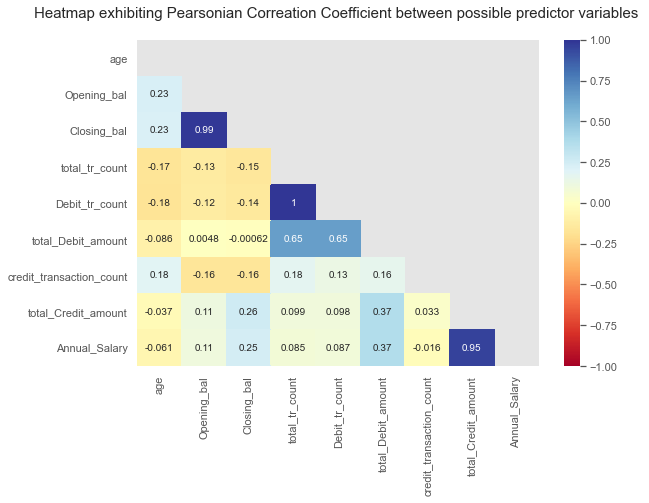

In [27]:
corr_matrix = np.triu(regression_df.corr())
plt.figure(figsize = (9,6))
plt.title('Heatmap exhibiting Pearsonian Correation Coefficient between possible predictor variables \n'
          , fontsize = 15)
sns.heatmap(regression_df.corr(), cmap = 'RdYlBu', annot = True,  vmin = -1, vmax = 1 
            , mask = corr_matrix);

#### Dropping columns implying presence of multicolinearity

In [28]:
features_to_drop = ['Opening_bal','total_tr_count']
regression_df = regression_df.drop(features_to_drop, axis = 1)

#### Creating Dummy Variables for Gender (Categorical) column 

In [29]:
regression_df = pd.get_dummies(regression_df, prefix = 'gender')
regression_df.rename( columns = {'gender_F' : 'Female', 'gender_M' : 'Male'}, inplace = True )

In [30]:
regression_df

,age,Closing_bal,Debit_tr_count,total_Debit_amount,credit_transaction_count,total_Credit_amount,Annual_Salary,Female,Male
customer_id,,,,,,,,,
CUS-1005756958,53,9310.03,60,3652.86,13,12616.11,50464.44,1,0
CUS-1117979751,21,18387.41,93,8933.82,7,25050.55,93044.90,0,1
CUS-1140341822,28,6820.26,74,5511.54,6,11499.06,49829.26,0,1
CUS-1147642491,34,15387.21,105,6732.75,13,22248.07,88992.28,1,0
CUS-1196156254,34,30899.53,238,8724.61,7,27326.11,101496.98,1,0
...,...,...,...,...,...,...,...,...,...
CUS-72755508,35,7036.56,46,2734.53,12,8703.84,37716.64,1,0
CUS-809013380,21,9872.11,111,5328.18,13,13481.91,53927.64,1,0
CUS-860700529,30,5243.81,227,7248.16,6,10851.72,47024.12,0,1


Here feature scaling is not done as it will not effect the model significantly. 

#### Fitting Multiple Linear Regression Model

In [31]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

target = regression_df['Annual_Salary']
predictors = regression_df.drop(['Annual_Salary'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=0)

In [32]:
regressor = LinearRegression()
clf = regressor.fit(X_train, y_train)

#### Getting Regression coefficients and intercept 

In [33]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

12890.359181656793
[-4.50633110e+01 -1.09021035e-02 -1.55295874e+01  6.49463246e-01
 -2.49647810e+02  3.31800819e+00 -9.85562022e+02  9.85562022e+02]


In [34]:
y_pred = regressor.predict(X_test)
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred })
result_df

,Actual,Predicted
customer_id,,
CUS-1790886359,79849.64,83916.971102
CUS-443776336,51508.60,52554.953525
CUS-1140341822,49829.26,51626.234954
CUS-2695611575,47707.40,51204.367504
CUS-3395687666,45703.06,47115.260246
...,...,...
CUS-1896554896,60025.42,59313.725816
CUS-1646621553,57143.32,62973.755290
CUS-1669695324,63717.16,61556.096422


### Normality Test : 

##### 1. Graphical Method (Histogram)

In [35]:
#finding errors = y_hat - y 
error = result_df['Actual'] - result_df['Predicted']

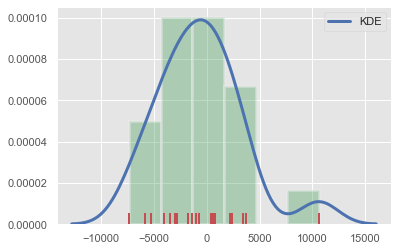

In [36]:
plt.style.use('ggplot')
plt.figure()
sns.distplot(error, kde = True, rug = True,  rug_kws = {'linewidth': 2, 'color' : 'r'},
             hist_kws = {'linewidth': 3, 'color': 'g'},
            kde_kws = {'color' : 'b', 'lw': 3, 'label': 'KDE'});

From the above Histogram with kernel density estimate, we can visually conclude that the error distribution has not deviated very much from the normal distribution. Now we check using hypothesis testing.

##### 2. Using Test Statistics  (Shapiro-Wilk and Anderson-Darling Test)

In [37]:
print('Test Results of Shapiro-Wilk Test : ') # Good test for less than 5000 samples
from scipy import stats
shapiro_test = stats.shapiro(error)
print('Statistic : %.3f' % shapiro_test.statistic)
p_value = 0.05
if shapiro_test.pvalue > p_value:
    print('Fails to reject the null hypothesis of normality at 5% level of significance')
else: 
    print( 'Rejects the null hypothesis of normality at 5% level of significance')


print( '\n')

print('Test Results of Anderson-Darling Test :')
anderson = stats.anderson(error)
print('Statistic: %.3f' % anderson.statistic)
for i in range(len(anderson.critical_values)):
    sl = anderson.significance_level[i]
    if anderson.statistic < anderson.critical_values[i]:
        print('Fails to reject the null hypothesis of normality at %d%% level of significance' % sl)
    else:
        print( 'Rejects the null hypothesis of normality at %d%% level of significance' % sl)

Test Results of Shapiro-Wilk Test : 
Statistic : 0.951
Fails to reject the null hypothesis of normality at 5% level of significance


Test Results of Anderson-Darling Test :
Statistic: 0.273
Fails to reject the null hypothesis of normality at 15% level of significance
Fails to reject the null hypothesis of normality at 10% level of significance
Fails to reject the null hypothesis of normality at 5% level of significance
Fails to reject the null hypothesis of normality at 2% level of significance
Fails to reject the null hypothesis of normality at 1% level of significance


From the above hypothesis tests, we can conclude that there is no significant violation of model assumptions.Also, we have already tried to eliminate the possibility of existence of multicollinearity. Hence, it is perfect to apply Linear Regression model in the current dataset. 

### Graphical Comparison of Actual and Predicted Salary

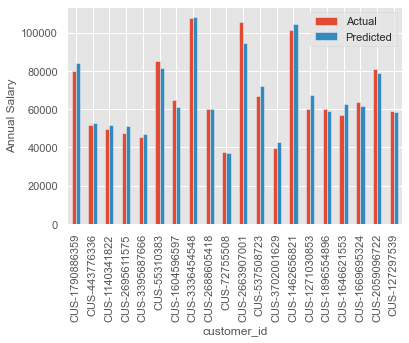

In [64]:
result_df.plot(kind='bar')

#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel('Annual Salary')
plt.show()

#### Checking Model Accuracy

In [39]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Absolute Percentage Error: ', mape(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred )))

Mean Absolute Error: 3073.7885564645176
Mean Absolute Percentage Error:  4.636103050955255
Mean Squared Error: 15917509.691530734
Root Mean Squared Error: 3989.6753867364614


Here we have computed different measures of model accuracy. RMSE is about 3989 which is quite large, hence the linear regresson model performance is not ideal for this data. 

On the other hand, We get a MAPE value of 4.64%. Hence, we can conclude that the multiple linear regression model has performed moderately well as a predictive model for the given dataset. Now we look forward to another popular supervised machine learning algorithm. 

## 2. Decision Tree Regression

#### Fitting the Model using RandomizedSearchCV

In this cross validation method, we have to create a list of possible values for different arguments in the function. Then using param_gridargument we have to provide our created set of possible parameter values and as the regressor argument we have to provide the regressor function (here DTR) This RandomizedSearchCV function then checks taking combination of arguments randomly and provides us the best accuracy score and that combination of arguments. 

In [40]:

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state=0)
from sklearn.model_selection import RandomizedSearchCV
model_params = { 'criterion' : [ "mse", "friedman_mse", "mae"] ,'splitter' : ["best", "random"],
                'max_depth' : [2,3,4,5], 'min_samples_split' : [10,12,13,14,15,16,18,20] ,
               'max_features' : ["auto", "sqrt", "log2"] }

from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Regressor
model = DecisionTreeRegressor()

# Creating Decision Tree regressor object
clf1 = RandomizedSearchCV(model, model_params, n_iter = 10000, cv = 10)

# Train Decision Tree regressor
clf1 = clf1.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf1.predict(X_test)

#clf.score(X_test, y_test)
result_df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred })
print(result_df1)


                  Actual     Predicted
customer_id                           
CUS-1790886359  79849.64  90769.986667
CUS-443776336   51508.60  53672.357143
CUS-1140341822  49829.26  46295.087273
CUS-2695611575  47707.40  46295.087273
CUS-3395687666  45703.06  46295.087273
...                  ...           ...
CUS-1896554896  60025.42  53672.357143
CUS-1646621553  57143.32  61793.524000
CUS-1669695324  63717.16  61793.524000
CUS-2059096722  81130.40  69159.090000
CUS-127297539   59217.08  61793.524000

[20 rows x 2 columns]


In [41]:
from pprint import pprint
pprint(clf1.best_estimator_.get_params())

{'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 13,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}


We have also used another cross validation technique namely GridSearchCV which produces similar results but it takes all possible combination of arguments. But, this technique does not improved the result significantly.

#### Checking Model Accuracy 

In [42]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Absolute Percentage Error: ', mape(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred )))

Mean Absolute Error: 4784.111705411255
Mean Absolute Percentage Error:  6.534526554431901
Mean Squared Error: 41761375.064742595
Root Mean Squared Error: 6462.304160649094


In [43]:
clf1.score(X_test, y_test)

0.898686732967573

As we can see, DTR has RMSE of about 6462, amlost double than multiple linear regression model and its MAPE score is 6.53% which is again larger than MLR model. Hence, we can conclude, multiple linear regression model has performed better in this predictive data analysis. 
    
But if we look individually, the DTR model has accuracy score of 89.9% which is quite good. Hence we can say that our model has performed well. 

Now we will discuss One way of improving the model accuracy by using decision tree classifier. 

#### Using Decision Tree Classifier

We know in case of DTC, the target variable should be categorical. Hence, in order to implement this model, we have to modify the target variable accordingly. One way is creating class intervals of annual salary and label encode them. 

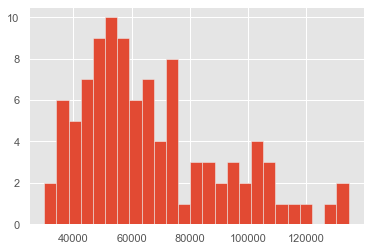

In [44]:
plt.figure()
plt.hist(regression_df['Annual_Salary'], bins = 25);

As seen from the above graph, even if we categorize and label encode the customers annual salary into 25 classes, there will be salary intervals of length around 4500 AUS, hence it will yield crude outputs, exact estimate can not be predicted. But this is one way to use the decision tree classifier algorithm and if we take more than 25 classes, it may yield good result. 

### Data Segmentation Using Cluster Analysis Technique 

In [45]:
cluster_df = pd.get_dummies(cluster_df, columns = ['gender', 'txn_description'] )

In [46]:
cluster_df.drop(['account','first_name','total_tr_count','Opening_bal'], axis = 1, inplace = True )

#### Hierarchical Clustering Algorithm

Here we create the distance matrix using Euclidean distance metric and then single linkage Agglomerative Hierarchical Clustering method is used to create a dendrogram which serves the purpose of finding optimal number of clusters visually as well as creates a nested set of partitions of the given dataset.

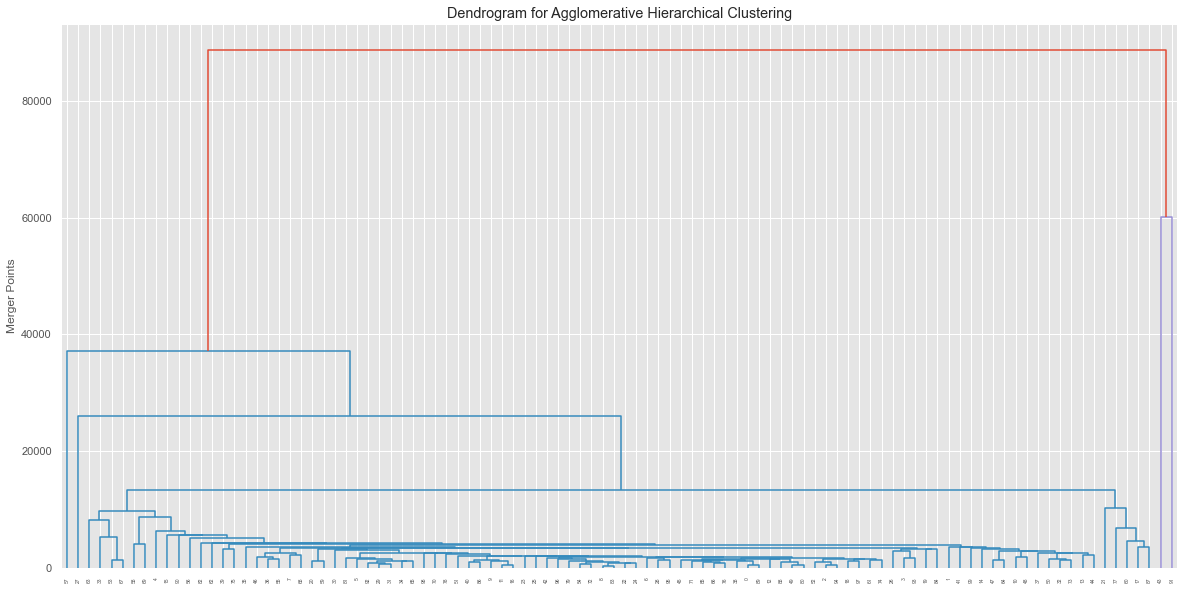

In [47]:
plt.figure(figsize = (20,10))
import scipy.cluster.hierarchy as hc
dendrogram = hc.dendrogram(hc.linkage(cluster_df, method = 'single'))

plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.ylabel('Merger Points', fontsize = 12)
plt.show()


In [48]:
from sklearn.cluster import AgglomerativeClustering
ahc = AgglomerativeClustering(n_clusters = 3  , affinity = 'euclidean', linkage = 'single')
y_ahc = ahc.fit_predict(cluster_df)
print(y_ahc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [49]:
np.unique(y_ahc, return_counts = True ) # Counting class frequency

(array([0, 1, 2], dtype=int64), array([98,  1,  1], dtype=int64))

Based on the above output we can say that the clustering algorithm based on the whole data performed very poorly. Hence we look for other data segmentation ideas.

#### Clustering based on two variables

##### Age vs Closing Balance

In [50]:
cluster_df1

,account,first_name,gender,age,Opening_bal,Closing_bal,total_tr_count,Debit_tr_count,total_Debit_amount,credit_transaction_count,total_Credit_amount,wage,Annual_Salary,Quarterly_savings_amount
customer_id,,,,,,,,,,,,,,
CUS-1005756958,ACC-2828321672,Stephanie,F,53,470.44,9310.03,73,60,3652.86,13,12616.11,970.47,50464.44,8963.25
CUS-1117979751,ACC-4065652575,Lucas,M,21,2390.35,18387.41,100,93,8933.82,7,25050.55,3578.65,93044.90,16116.73
CUS-1140341822,ACC-80388494,Dustin,M,28,832.74,6820.26,80,74,5511.54,6,11499.06,1916.51,49829.26,5987.52
CUS-1147642491,ACC-3233697971,Robin,F,34,14.89,15387.21,118,105,6732.75,13,22248.07,1711.39,88992.28,15515.32
CUS-1196156254,ACC-3485804958,Jessica,F,34,12563.48,30899.53,245,238,8724.61,7,27326.11,3903.73,101496.98,18601.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUS-72755508,ACC-53508546,Kimberly,F,35,341.93,7036.56,58,46,2734.53,12,8703.84,725.32,37716.64,5969.31
CUS-809013380,ACC-1990648130,Kaitlyn,F,21,1718.38,9872.11,124,111,5328.18,13,13481.91,1037.07,53927.64,8153.73
CUS-860700529,ACC-1903037542,Jeffrey,M,30,13.64,5243.81,233,227,7248.16,6,10851.72,1808.62,47024.12,3603.56


#### Feature Scaling

In [51]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

c_age_sal = pd.DataFrame()
c_age_sal  = cluster_df1[[ 'age','Closing_bal' ]]
c_age_sal[['Closing_bal' ]] = minmax.fit_transform(c_age_sal[[ 'Closing_bal' ]])

In [52]:
c_age_sal #scaled dataset

,age,Closing_bal
customer_id,,
CUS-1005756958,53,0.027127
CUS-1117979751,21,0.061445
CUS-1140341822,28,0.017714
CUS-1147642491,34,0.050102
CUS-1196156254,34,0.108749
...,...,...
CUS-72755508,35,0.018532
CUS-809013380,21,0.029252
CUS-860700529,30,0.011754


#### Implementing Hierarchical Clustering Algorithm

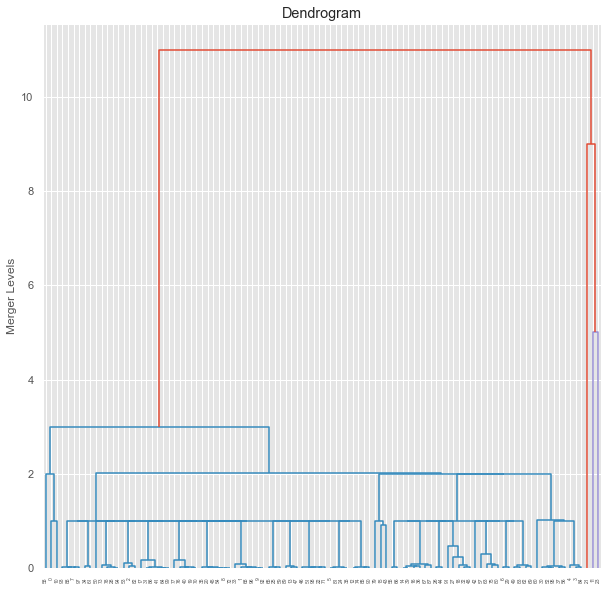

In [53]:
plt.figure(figsize = (10,10))
import scipy.cluster.hierarchy as hc
dendrogram = hc.dendrogram(hc.linkage(c_age_sal, method = 'single'))

plt.title('Dendrogram')
plt.ylabel('Merger Levels')
plt.show()

In [54]:
from sklearn.cluster import AgglomerativeClustering
ahc = AgglomerativeClustering(n_clusters = 3  , affinity = 'euclidean', linkage = 'single')
y_ahc = ahc.fit_predict(c_age_sal)
print(y_ahc)

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [55]:
np.unique(y_ahc, return_counts = True)

(array([0, 1, 2], dtype=int64), array([ 2, 97,  1], dtype=int64))

From the above output,we can conclude Hierarchical clustering performed very poorly. Hence, we proceed to do clustering using a non-hierarchical algorithm namely k-means clustering. 

#### K-Means Clustering Algorithm

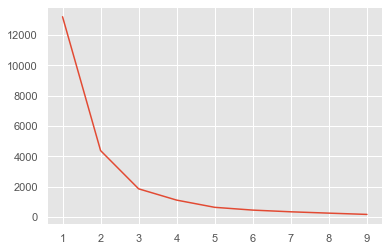

In [56]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 10000, n_init = 20, 
                   random_state = 0)
    kmeans.fit(c_age_sal)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
# plt.title()
# plt.xlabel()
# plt.ylabel()
plt.show()

In [57]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(c_age_sal)

In [58]:
print(np.unique(y_kmeans, return_counts = True))

(array([0, 1, 2]), array([56, 41,  3], dtype=int64))


In [59]:
print(wcss)

[13195.56442041737, 4377.717974287569, 1859.101080561276, 1115.7228432666263, 640.9358425487203, 457.9258719408131, 346.2506640443445, 257.69518970426236, 173.84115116141723]


In [60]:
c_age_sal['cluster'] = y_kmeans

In [61]:
c_age_sal[c_age_sal['cluster'] == 0 ].sort_values('Closing_bal')

,age,Closing_bal,cluster
customer_id,,,
CUS-2487424745,26,0.000000,0
CUS-3702001629,18,0.003510,0
CUS-1271030853,30,0.004934,0
CUS-325142416,21,0.010630,0
CUS-860700529,30,0.011754,0
...,...,...,...
CUS-261674136,29,0.085597,0
CUS-2059096722,21,0.152010,0
CUS-2663907001,28,0.163550,0


#### Visualizing the output

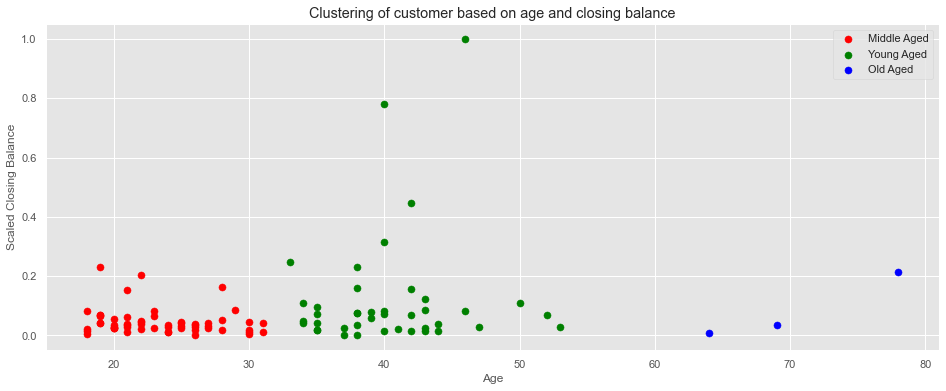

In [63]:
plt.figure(figsize = (16,6))
plt.scatter((c_age_sal[c_age_sal.cluster == 0 ]).age, 
            (c_age_sal[c_age_sal.cluster == 0 ]).Closing_bal, s = 50, c= 'red', label = 'Middle Aged')
plt.scatter((c_age_sal[c_age_sal.cluster == 1 ]).age, 
            (c_age_sal[c_age_sal.cluster == 1 ]).Closing_bal, s = 50, c= 'green', label = 'Young Aged')
plt.scatter((c_age_sal[c_age_sal.cluster == 2 ]).age, 
            (c_age_sal[c_age_sal.cluster == 2 ]).Closing_bal, s = 50, c= 'blue', label = 'Old Aged')

plt.title('Clustering of customer based on age and closing balance')
plt.xlabel('Age')
plt.ylabel('Scaled Closing Balance')
plt.legend()
plt.show()

From the above output, we can see that based on age and closing balance, we have done the data segmentation quite successfully.Most of the persons have low closing balance, which is a bit unusual and it happened may be because of the synthesisation of the dataset. 